In [5]:
from dataclasses import dataclass

import gymnasium as gym
import torch
import tyro
from mani_skill.utils.wrappers.record import RecordEpisode

from twsim import envs  # noqa: F401
from twsim.robots import transwheel  # noqa: F401

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("paper")
sns.set_style("ticks")

/class/cs152/miniforge3/envs/gymtest/lib/python3.12/site-packages/sapien/_vulkan_tricks.py:37: UserWarning: Failed to find Vulkan ICD file. This is probably due to an incorrect or partial installation of the NVIDIA driver. SAPIEN will attempt to provide an ICD file anyway but it may not work.
  warn(


In [6]:
@dataclass
class Args:
    """Experiment configuration and arguments."""

    # fmt: off

    env_id: str = "StepVel-v1"  # Environment ID
    num_envs: int = 1         # Number of environments
    video: bool = False       # Output a video

    # fmt: on


# args = tyro.cli(Args)
args = Args()

In [7]:
num_envs = args.num_envs
should_close = True

env = gym.make(args.env_id, render_mode="rgb_array", num_envs=num_envs)

env.unwrapped.print_sim_details()  # type: ignore
print(f"{env.unwrapped.reward_mode=}")  # type: ignore

chassis_orientation.device=device(type='cpu')
collision.device=device(type='cpu')
# -------------------------------------------------------------------------- #
Task ID: StepVel-v1, 1 parallel environments, sim_backend=physx_cpu
obs_mode=state, control_mode=wheel_vel_ext_pos
render_mode=rgb_array, sensor_details=
sim_freq=100, control_freq=20
observation space: Box(-inf, inf, (1, 19), float32)
(single) action space: Box(-1.0, 1.0, (8,), float32)
# -------------------------------------------------------------------------- #
env.unwrapped.reward_mode='normalized_dense'


In [8]:
args.video = True

if args.video:
    print("Recording")
    env = RecordEpisode(
        env,  # type: ignore
        output_dir="./",
        save_trajectory=False,
        info_on_video=True,
        max_steps_per_video=500,
    )

Recording


In [9]:
normalized_speed = 0.2
still = torch.zeros(num_envs, 4)
forward = torch.ones(num_envs, 4) * normalized_speed
rotate_left = torch.tensor([[1, 1, -1, -1]] * num_envs) * normalized_speed

target_speed = 0.6
target_forward = torch.ones(num_envs, 4) * target_speed


extensions_0p = torch.ones(num_envs, 4) * -1
extensions_10p = torch.ones(num_envs, 4) * -0.8
extensions_50p = torch.ones(num_envs, 4) * 0.0

action_sequence = [
    torch.cat((still, extensions_0p), dim=-1),
    torch.cat((target_forward, extensions_0p), dim=-1),
    torch.cat((target_forward, extensions_0p), dim=-1),
    torch.cat((still, extensions_0p), dim=-1),
    torch.cat((still, extensions_50p), dim=-1),
    torch.cat((still, extensions_50p), dim=-1),
    torch.cat((forward, extensions_50p), dim=-1),
    # torch.cat((still, extensions_0p), dim=-1),
    # torch.cat((rotate_left, extensions_0p), dim=-1),
    # torch.cat((still, extensions_10p), dim=-1),
    # torch.cat((forward, extensions_10p), dim=-1),
    # torch.cat((still, extensions_50p), dim=-1),
    # torch.cat((forward, extensions_50p), dim=-1),
]

In [10]:
# a, b = env.get_bboxes()
# a = a[0]

# # print("volume=", abs(a[0].bounds).sum(axis=0).prod())
# b.bounds

# # b.bounds.sum(axis=0).prod(), 0.00018
# # (b.bounds[1] - b.bounds[0]).prod()

# x = 9e-2 + 1.5e-2 * 2
# y = 6e-2 + 0.2e-2 * 2 + 0.2e-2 * 2
# z = 1e-2 + 1.625e-2 * 2

# a.bounds, 0.000054

# # (a.bounds[1] - a.bounds[0]), (x,y, z)#.prod(), 0.09*0.06*0.01

# b1minX, b1minY, b1minZ = a.bounds[0]
# b1maxX, b1maxY, b1maxZ = a.bounds[1]

# a.bounds, b1minX, b1minY, b1minZ, b1maxX, b1maxY, b1maxZ

In [11]:
obs, _ = env.reset(seed=0)

num_steps_per_action = 50
max_steps = 500

old_action_index = -1

print("Starting demo with fixed actions...")

# "velocity", 
labels = ["elapsed_steps", "velx", "vely", "velz", "vel", "velocity_error", "reward_velocity", "extension", "reward_extension", "reward", "contact", "distance"]
df_rows = []

for stepi in range(max_steps):
    action_index = int(stepi / num_steps_per_action)
    if action_index >= len(action_sequence):
        break

    if action_index != old_action_index:
        # print(f"Step {stepi}: action {action_index + 1} of {len(action_sequence)}")
        old_action_index = action_index

    action = action_sequence[action_index]

    obs, reward, terminated, truncated, info = env.step(action)
    # print(f"{reward=}")
    # print(f"{info=}")

    info["velx"] = info["velocity"].squeeze()[0]
    info["vely"] = info["velocity"].squeeze()[1]
    info["velz"] = info["velocity"].squeeze()[2]
    info["vel"] =  info["velocity"].squeeze().norm()
    # info["contact"] = torch.tensor(info["collision"], dtype=torch.float)
    info["contact"] = info["distance"]

    info["reward"] = reward

    df_rows.append({l: info[l].item() for l in labels})

    # r, s = env.get_bboxes()
    # print(action[0][:4], bboxes_overlap(r[0].bounds, s.bounds))

print('Done.')

chassis_orientation.device=device(type='cpu')
collision.device=device(type='cpu')
Starting demo with fixed actions...
chassis_orientation.device=device(type='cpu')
collision.device=device(type='cpu')
chassis_orientation.device=device(type='cpu')
collision.device=device(type='cpu')
chassis_orientation.device=device(type='cpu')
collision.device=device(type='cpu')
chassis_orientation.device=device(type='cpu')
collision.device=device(type='cpu')
chassis_orientation.device=device(type='cpu')
collision.device=device(type='cpu')
chassis_orientation.device=device(type='cpu')
collision.device=device(type='cpu')
chassis_orientation.device=device(type='cpu')
collision.device=device(type='cpu')
chassis_orientation.device=device(type='cpu')
collision.device=device(type='cpu')
chassis_orientation.device=device(type='cpu')
collision.device=device(type='cpu')
chassis_orientation.device=device(type='cpu')
collision.device=device(type='cpu')
chassis_orientation.device=device(type='cpu')
collision.device

In [12]:
info

{'elapsed_steps': tensor([350], dtype=torch.int32),
 'fail': tensor([False]),
 'velocity': tensor([[0.0756, 0.0010, 0.1032]]),
 'extension': tensor([6.1576]),
 'distance': tensor([0.0457], dtype=torch.float64),
 'velocity_error': tensor([0.2470]),
 'reward_velocity': tensor([0.1560]),
 'reward_extension': tensor([0.]),
 'velx': tensor(0.0756),
 'vely': tensor(0.0010),
 'velz': tensor(0.1032),
 'vel': tensor(0.1279),
 'contact': tensor([0.0457], dtype=torch.float64),
 'reward': tensor([0.0780])}

In [13]:
if should_close:
    print("Closing")
    env.close()

Closing


In [14]:
df = pd.DataFrame(df_rows)
df.head()

,elapsed_steps,velx,vely,velz,vel,velocity_error,reward_velocity,extension,reward_extension,reward,contact,distance
0,1,0.008217,0.000138,0.001250,0.008312,0.291786,0.102555,0.010768,0.946213,0.524384,0.059083,0.059083
1,2,0.008077,0.000165,0.000959,0.008135,0.291925,0.102420,0.010406,0.948018,0.525219,0.058800,0.058800
2,3,0.007915,0.000358,0.000857,0.007969,0.292087,0.102263,0.009959,0.950244,0.526254,0.058496,0.058496
3,4,0.007889,0.000198,0.000371,0.007900,0.292111,0.102239,0.009909,0.950494,0.526367,0.058175,0.058175
4,5,0.007928,0.000337,0.000248,0.007939,0.292073,0.102277,0.009235,0.953856,0.528066,0.057831,0.057831


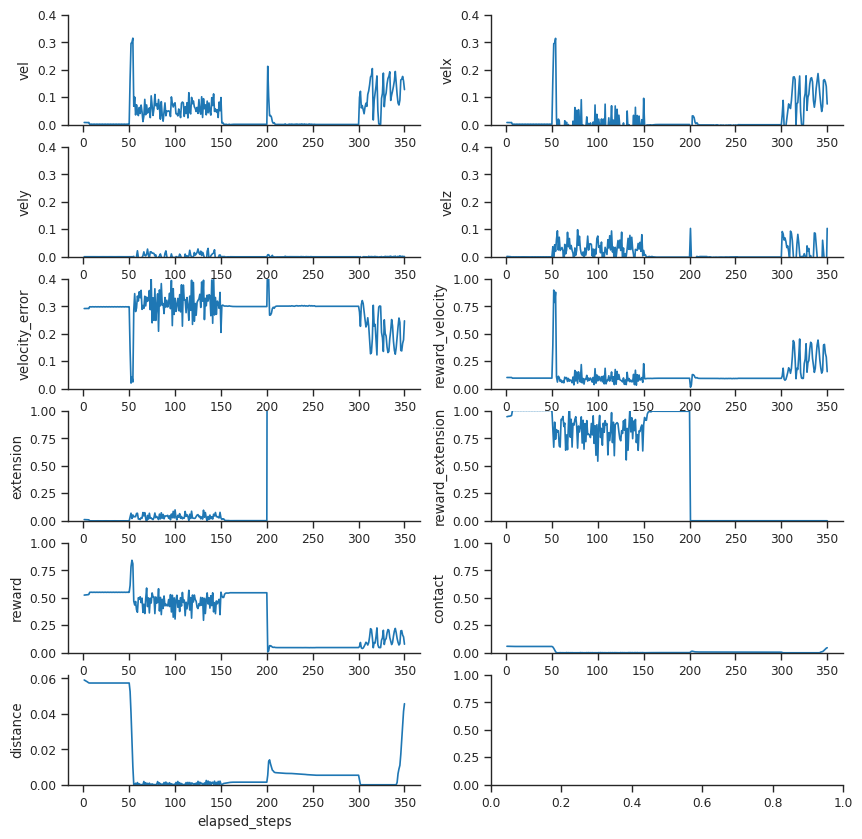

In [15]:
to_plot = [["vel", "velx"], ["vely", "velz"], ["velocity_error", "reward_velocity"], ["extension", "reward_extension"], ["reward", "contact"], ["distance"]]
limits = [[0, 0.4]] * 5 + [[0, 1]] * 5 + [0, 1]

num_rows = len(to_plot)
num_cols = len(to_plot[0])

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

labels = [l for row in to_plot for l in row]

for ax, label, lims in zip(axes.flatten(), labels, limits):
    sns.lineplot(ax=ax, data=df, x="elapsed_steps", y=label)
    ax.set_ylim(lims)

sns.despine()

<Axes: >

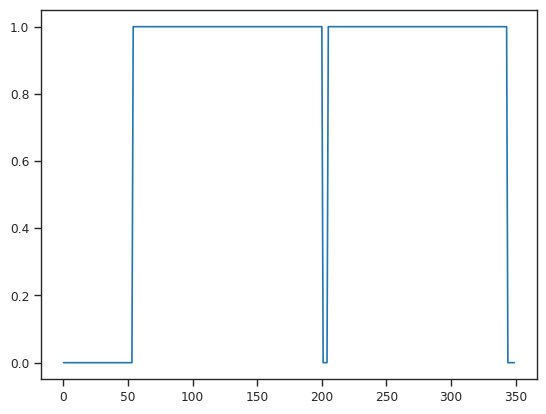

In [17]:
(df["distance"] < 0.01).astype(float).plot()

In [80]:
import numpy as np

bb = torch.tensor(np.array([
    [-0.06000149, -0.04700007,  0.00039105],
    [ 0.06064923,  0.04700007,  0.0274951 ]
])).unsqueeze(dim=0).repeat(num_envs, 1, 1)

In [81]:
positions = torch.tensor([
    [1.0000, 0.0000, 0.0160],
    [0.0000, 2.0000, 0.0160]
]).unsqueeze(dim=1).repeat(1, 2, 1)

In [82]:
bb.shape, positions.shape

(torch.Size([2, 2, 3]), torch.Size([2, 2, 3]))

In [83]:
bb + positions

tensor([[[ 0.9400, -0.0470,  0.0164],
         [ 1.0606,  0.0470,  0.0435]],

        [[-0.0600,  1.9530,  0.0164],
         [ 0.0606,  2.0470,  0.0435]]], dtype=torch.float64)

In [84]:
bb

tensor([[[-0.0600, -0.0470,  0.0004],
         [ 0.0606,  0.0470,  0.0275]],

        [[-0.0600, -0.0470,  0.0004],
         [ 0.0606,  0.0470,  0.0275]]], dtype=torch.float64)

In [85]:
positions

tensor([[[1.0000, 0.0000, 0.0160],
         [1.0000, 0.0000, 0.0160]],

        [[0.0000, 2.0000, 0.0160],
         [0.0000, 2.0000, 0.0160]]])

In [86]:
bb[0][1] - bb[0][0]

tensor([0.1207, 0.0940, 0.0271], dtype=torch.float64)

In [93]:
torch.tensor(np.array([
    [-0.06000149, -0.04700007,  -0.03125],
    [ 0.06064923,  0.04700007,   0.03125 ]
])).sum(dim=0)

tensor([0.0006, 0.0000, 0.0000], dtype=torch.float64)

In [92]:
(.0274951 - .00039105) / 2

0.013552025

In [6]:
def bbox_distance(a, b):
    """
    Compute the minimum Euclidean distance between two 3D bounding boxes (batched).
    Each bbox should be a tensor of shape (batch, 2, 3), where [:,0,:] is min_corner and [:,1,:] is max_corner.
    Returns: tensor of shape (batch,)
    """
    # a, b: (batch, 2, 3)
    a_min, a_max = a[:, 0, :], a[:, 1, :]
    b_min, b_max = b[:, 0, :], b[:, 1, :]

    # For each axis, compute the distance between the boxes (0 if overlapping)
    dx = torch.maximum(a_min[:, 0] - b_max[:, 0], b_min[:, 0] - a_max[:, 0])
    dx = torch.clamp(dx, min=0)
    dy = torch.maximum(a_min[:, 1] - b_max[:, 1], b_min[:, 1] - a_max[:, 1])
    dy = torch.clamp(dy, min=0)
    dz = torch.maximum(a_min[:, 2] - b_max[:, 2], b_min[:, 2] - a_max[:, 2])
    dz = torch.clamp(dz, min=0)

    return torch.sqrt(dx * dx + dy * dy + dz * dz)


agent_bbox=torch.tensor([[[-0.0600 + 1, -0.0470, -0.0312],
         [ 0.0606 + 1,  0.0470,  0.0312]],

        [[-0.0600, -0.0470, -0.0312],
         [ 0.0606,  0.0470,  0.0312]]])

step_bbox=torch.tensor([[[ 0.1200, -0.3000, -0.0100],
         [ 0.1800,  0.3000,  0.0300]],

        [[ 0.1200, -0.3000, -0.0100],
         [ 0.1800,  0.3000,  0.0300]]])

In [10]:
(bbox_distance(agent_bbox, step_bbox) < 0.1).type(torch.float)

tensor([0., 1.])